In [1]:

import pandas as pd

In [2]:
#reading the dataset
df=pd.read_csv("Dataset/day.csv")

In [3]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
df.drop(["instant","casual","registered"],axis=1,inplace=True)

In [5]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
#Checking missing values
df.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      730 non-null    object 
 1   season      730 non-null    int64  
 2   yr          730 non-null    int64  
 3   mnth        730 non-null    int64  
 4   holiday     730 non-null    int64  
 5   weekday     730 non-null    int64  
 6   workingday  730 non-null    int64  
 7   weathersit  730 non-null    int64  
 8   temp        730 non-null    float64
 9   atemp       730 non-null    float64
 10  hum         730 non-null    float64
 11  windspeed   730 non-null    float64
 12  cnt         730 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 74.3+ KB


In [8]:
# List of columns to check for outliers
columns = ['temp', 'atemp', 'hum', 'windspeed']

for column in columns:
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    print(f"Outliers in {column}:")
    print(len(outliers))
    print("*"*100)
    
    # Remove outliers
    df = df[~((df[column] < lower_bound) | (df[column] > upper_bound))]

Outliers in temp:
0
****************************************************************************************************
Outliers in atemp:
0
****************************************************************************************************
Outliers in hum:
2
****************************************************************************************************
Outliers in windspeed:
12
****************************************************************************************************


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      716 non-null    object 
 1   season      716 non-null    int64  
 2   yr          716 non-null    int64  
 3   mnth        716 non-null    int64  
 4   holiday     716 non-null    int64  
 5   weekday     716 non-null    int64  
 6   workingday  716 non-null    int64  
 7   weathersit  716 non-null    int64  
 8   temp        716 non-null    float64
 9   atemp       716 non-null    float64
 10  hum         716 non-null    float64
 11  windspeed   716 non-null    float64
 12  cnt         716 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 78.3+ KB


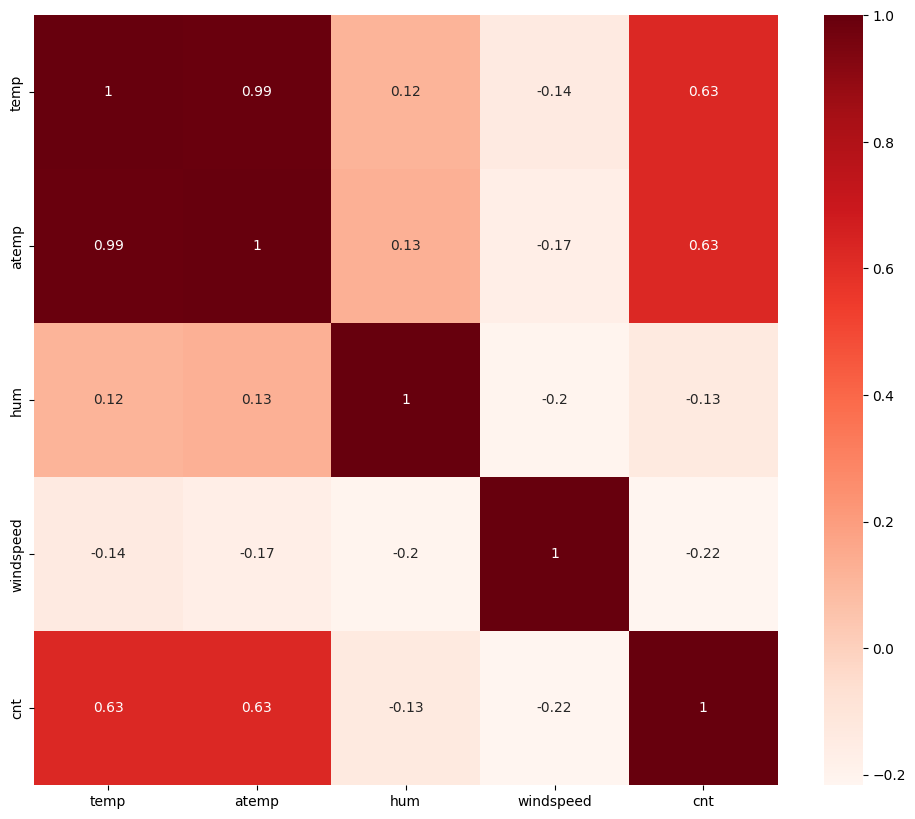

Removed columns: {'atemp'}


In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only the specified columns
selected_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
cor = df[selected_columns].corr()

plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Remove features with high correlation
threshold = 0.8
columns_to_remove = set()
for i in range(len(cor.columns)):
    for j in range(i):
        if abs(cor.iloc[i, j]) > threshold:
            colname = cor.columns[i]
            columns_to_remove.add(colname)

df.drop(columns=columns_to_remove, axis=1, inplace=True)
print(f"Removed columns: {columns_to_remove}")

In [11]:
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


In [12]:
#extract year from dteday
df['year'] = pd.DatetimeIndex(df['dteday']).year
# from day column find the number of week of the month
df['week_of_month'] = df['dteday'].apply(lambda x: (pd.to_datetime(x).day - 1) // 7 + 1)

C:\Users\Vinay Bora\AppData\Local\Temp\ipykernel_2692\1924865053.py:4: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['week_of_month'] = df['dteday'].apply(lambda x: (pd.to_datetime(x).day - 1) // 7 + 1)


In [13]:
df.sample(7)


,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,week_of_month
440,17-03-2019,1,1,3,0,6,0,2,21.080847,75.5833,7.417168,7836,2019,3
285,13-10-2018,4,0,10,0,4,1,2,24.155847,89.6667,9.499729,2913,2018,2
663,26-10-2019,4,1,10,0,5,1,2,22.379153,80.7083,8.875289,7444,2019,4
363,30-12-2018,1,0,12,0,5,1,1,12.778347,63.6667,9.000579,2999,2018,5
324,21-11-2018,4,0,11,0,1,1,3,18.347500,91.0000,9.249618,2765,2018,3
503,19-05-2019,2,1,5,0,6,0,1,24.600000,45.6250,5.626325,8294,2019,3
137,18-05-2018,2,0,5,0,3,1,2,22.550000,87.0000,13.499964,3855,2018,3


In [14]:
df.drop(["dteday"],axis=1,inplace=True)

In [15]:
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt,year,week_of_month
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985,2018,1
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801,2018,1
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349,2018,1
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562,2018,1
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600,2018,1


In [16]:
# One hot encoding
df = pd.get_dummies(df, columns=['season', 'mnth', 'weekday', 'weathersit','yr','year', 'week_of_month', 'holiday', 'workingday'], drop_first=True).astype('float64')

In [17]:
df.head(6)

,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,...,weathersit_2,weathersit_3,yr_1,year_2019,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5,holiday_1,workingday_1
0,14.110847,80.5833,10.749882,985.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,14.902598,69.6087,16.652113,801.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.050924,43.7273,16.636703,1349.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,8.200000,59.0435,10.739832,1562.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.305237,43.6957,12.522300,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,8.378268,51.8261,6.000868,1606.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [18]:
#do scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
columns_to_scale = ['temp', 'hum', 'windspeed']
df[columns_to_scale] = sc.fit_transform(df[columns_to_scale])


In [19]:
df.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,...,weathersit_2,weathersit_3,yr_1,year_2019,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5,holiday_1,workingday_1
0,-0.835905,1.254842,-0.360109,985.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.730683,0.465708,0.867064,801.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.641250,-1.395307,0.863860,1349.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.621438,-0.293988,-0.362199,1562.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.474556,-1.397579,0.008406,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [20]:
df.head()

,temp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,...,weathersit_2,weathersit_3,yr_1,year_2019,week_of_month_2,week_of_month_3,week_of_month_4,week_of_month_5,holiday_1,workingday_1
0,-0.835905,1.254842,-0.360109,985.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.730683,0.465708,0.867064,801.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.641250,-1.395307,0.863860,1349.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-1.621438,-0.293988,-0.362199,1562.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-1.474556,-1.397579,0.008406,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 729
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   temp             716 non-null    float64
 1   hum              716 non-null    float64
 2   windspeed        716 non-null    float64
 3   cnt              716 non-null    float64
 4   season_2         716 non-null    float64
 5   season_3         716 non-null    float64
 6   season_4         716 non-null    float64
 7   mnth_2           716 non-null    float64
 8   mnth_3           716 non-null    float64
 9   mnth_4           716 non-null    float64
 10  mnth_5           716 non-null    float64
 11  mnth_6           716 non-null    float64
 12  mnth_7           716 non-null    float64
 13  mnth_8           716 non-null    float64
 14  mnth_9           716 non-null    float64
 15  mnth_10          716 non-null    float64
 16  mnth_11          716 non-null    float64
 17  mnth_12          716 

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df.drop(columns=['cnt'])
y = df['cnt']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 620912.2114674844
R-squared: 0.8328420628073498


In [24]:
# Make predictions
y_pred = model.predict(X_train)

# Calculate metrics
mse = mean_squared_error(y_train, y_pred)
r2 = r2_score(y_train, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 538922.9807426252
R-squared: 0.8552703850668358


In [25]:
#implementing decision tree
from sklearn.tree import DecisionTreeRegressor

# Initialize the model
tree_model = DecisionTreeRegressor(random_state=42)

# Train the model
tree_model.fit(X_train, y_train)

# Make predictions
y_pred_tree = tree_model.predict(X_test)

# Calculate metrics
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Decision Tree Mean Squared Error: {mse_tree}")
print(f"Decision Tree R-squared: {r2_tree}")



Decision Tree Mean Squared Error: 818788.0625
Decision Tree R-squared: 0.7795712163528064


In [26]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate metrics
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R-squared: {r2_rf}")

Random Forest Mean Squared Error: 364379.00071319443
Random Forest R-squared: 0.901904261197275


In [ ]:
# %pip install xgboost

import xgboost as xgb

# Initialize the model
xgb_model = xgb.XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost Mean Squared Error: {mse_xgb}")
print(f"XGBoost R-squared: {r2_xgb}")

In [27]:
# %pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the model
nn_model = Sequential()

# Add layers to the model
nn_model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
nn_model.add(Dense(32, activation='relu'))
nn_model.add(Dense(1))

# Compile the model
nn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
nn_model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=1)

# Make predictions
y_pred_nn = nn_model.predict(X_test)

# Calculate metrics
mse_nn = mean_squared_error(y_test, y_pred_nn)
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network Mean Squared Error: {mse_nn}")
print(f"Neural Network R-squared: {r2_nn}")


ModuleNotFoundError: No module named 'tensorflow'